# 1 Business Understanding

## 1.1 Contexto y motivación
<div align="justify">
Las personas con discapacidades motoras severas, como las que ocurren tras una lesión medular, enfrentan barreras significativas para interactuar con su entorno. La OMS estima que más de 15 millones de personas viven con lesión medular a nivel mundial y cada año se presentan 250 000–500 000 nuevos casos[1]. En Perú, reportes recientes del Instituto Nacional de Rehabilitación (2024) registran más de 1500 atenciones médicas por diagnóstico de lesión medular[2].
Dado que estos pacientes no pueden utilizar sistemas tradicionales de control (botones, joysticks, pantallas táctiles), se requieren interfaces cerebro-computadora (BCI) no invasivas, seguras y de bajo costo que permitan transformar la actividad cerebral voluntaria en comandos útiles para el control de dispositivos domésticos o de asistencia.
</div>

## 1.2 Solución a la problemática
<div align="justify">
El proyecto propone diseñar un sistema BCI basado en EEG para detectar la imaginación motora (MI), es decir, la actividad cerebral generada cuando una persona piensa en mover la mano derecha, izquierda, ambas manos o los pies, sin realizar ningún movimiento físico.
Esta señal puede ser procesada en tiempo real mediante técnicas de filtrado, extracción de características y clasificación, mapeando cada intención motora a una acción (por ejemplo, encender/apagar luces o mover un cursor).
A diferencia de otros métodos como el uso de parpadeos (artefactos EOG), la imaginación motora refleja la activación de áreas corticales motoras (C3, Cz, C4) y ofrece un control más flexible y rico en comandos, aunque su detección es más compleja[3].
</div>

## 1.3 Señal EEG
La electroencefalografía (EEG) mide diferencias de potencial eléctrico generadas por la actividad sincrónica de neuronas corticales. En tareas de imaginación motora, se observa:
+ Desincronización del ritmo mu (8–13 Hz) y beta (13–30 Hz) sobre la corteza motora contralateral (event-related desynchronization, ERD).
+ Rebote de sincronización (ERS) posterior al movimiento o imaginación.
+ Estas variaciones se registran principalmente en electrodos C3, Cz y C4 (sistema 10–20).
Detectar MI requiere mayor procesamiento que detectar parpadeos, ya que la señal es más débil (10–20 µV) y susceptible a artefactos (EMG, EOG, ruido eléctrico) [4].


## 1.4 Objetivos 
+ Diseñar e implementar un pipeline de procesamiento EEG para detectar imaginación motora en tiempo real.
+ Clasificar entre cuatro clases: mano derecha, mano izquierda, ambas manos y pies.
+ Validar el algoritmo con bases de datos públicas especializadas en MI.
+ Explorar la factibilidad de mapear estas clases a acciones de control simples (p. ej., activar dispositivos).

## 1.5 Alcances y requisitos
+ Software únicamente: procesamiento, filtrado, extracción de características (CSP, wavelets, PSD) y clasificación (SVM, LDA o CNN) [5].
+ No invasivo y de bajo costo: uso de EEG estándar o datasets open-access (ej. BCI Competition IV dataset 2a).
+ Privacidad: datos EEG considerados sensibles → anonimización, consentimiento informado, control de acceso.


## 1.6 Stakeholders
+ Estudiantes y/o investigadores: obtención de código y reportes realizados.
+ Profesores del curso: evaluación académica de los alumnos.
+ Un interesado a futuro serían las personas que sufren de lesiones motoras y sus familiares, ya que por ahora no se piensa realizar el hardware del proyecto y solo se quedaría como una idea posiblemente funcional.

# 2 Data Understanding

## 2.1 Propiedades de la señal EGG en imaginación motora

a

## 2.2 Datasets públicos encontrados

a

## 2.3 Criterios para la selección del dataset

a

## 2.4 Calidad de datos y chequeos iniciales

a

## 2.5 Preprocesado

a

## 2.6 Estrategia de validación

a

## 2.7 Métricas específicas para detección de eventos

a

## 2.8 Ética de manejo de los datos

a

## Bibliografía
- [1]https://www.who.int/es/news-room/fact-sheets/detail/spinal-cord-injury
- [2]https://www.gob.pe/institucion/minsa/noticias/45224-instituto-de-rehabilitacion-registra-incremento-de-pacientes-con-lesiones-medulares
- [3]https://www.gob.pe/institucion/minsa/noticias/975047-instituto-nacional-de-rehabilitacion-brindo-mas-de-1500-atenciones-en-consulta-medica-a-pacientes-con-diagnostico-de-lesion-medular
- [4]https://www.epj-nbp.org/articles/epjnbp/abs/2015/01/40366_2015_Article_24/40366_2015_Article_24.html
- [5]https://pubmed.ncbi.nlm.nih.gov/23706528/
- [6]
- [7]
- [8]
- [9]
- [10]

In [2]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


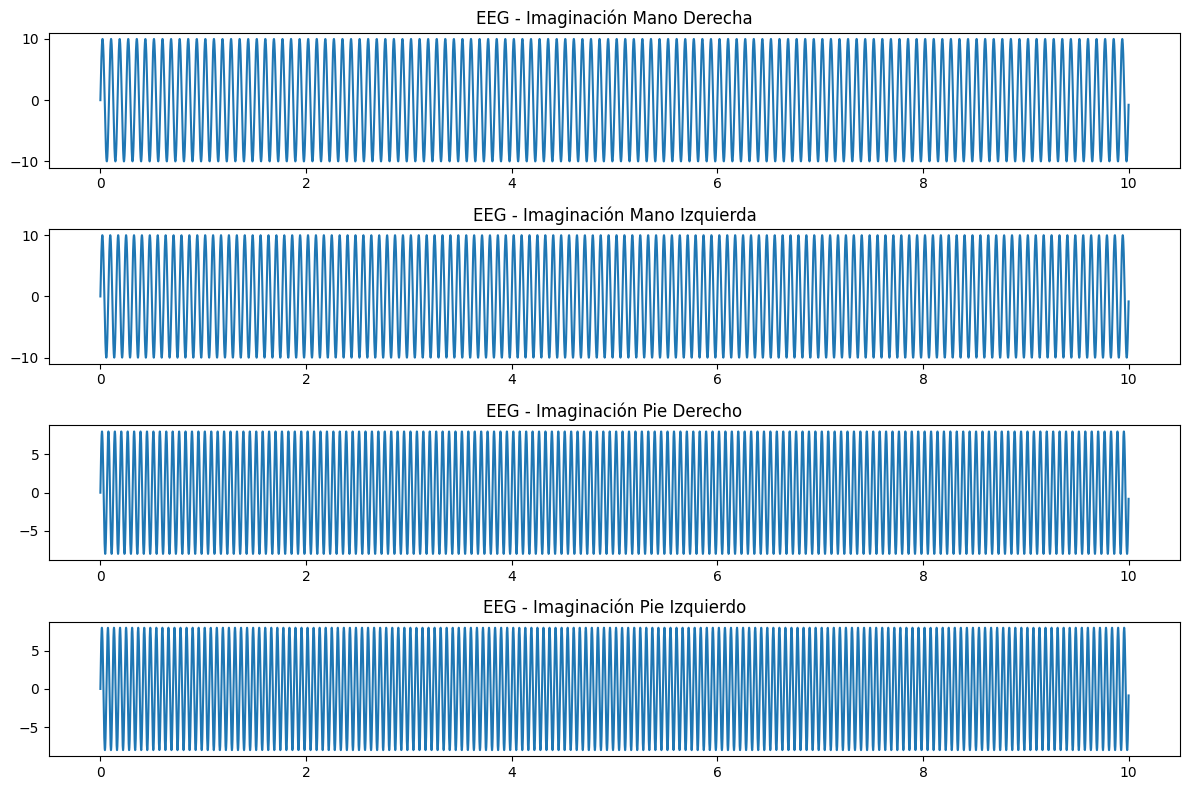

In [5]:
import numpy as np
import neurokit2 as nk

# Simular señales EEG para imaginación motora de mano derecha, mano izquierda, pie derecho y pie izquierdo
# Usaremos neurokit2 para simular señales con diferentes frecuencias y amplitudes


sampling_rate = 1000
duration = 10  # segundos
time = np.linspace(0, duration, duration * sampling_rate)

# Simulación básica: cada clase tendrá una frecuencia dominante diferente
eeg_right_hand = nk.signal_simulate(duration=duration, sampling_rate=sampling_rate, frequency=12, amplitude=10)  # Mu rhythm (mano derecha)
eeg_left_hand = nk.signal_simulate(duration=duration, sampling_rate=sampling_rate, frequency=13, amplitude=10)   # Mu rhythm (mano izquierda)
eeg_right_foot = nk.signal_simulate(duration=duration, sampling_rate=sampling_rate, frequency=16, amplitude=8)   # Beta rhythm (pie derecho)
eeg_left_foot = nk.signal_simulate(duration=duration, sampling_rate=sampling_rate, frequency=17, amplitude=8)    # Beta rhythm (pie izquierdo)

# Visualizar las señales simuladas
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time, eeg_right_hand)
plt.title("EEG - Imaginación Mano Derecha")
plt.subplot(4, 1, 2)
plt.plot(time, eeg_left_hand)
plt.title("EEG - Imaginación Mano Izquierda")
plt.subplot(4, 1, 3)
plt.plot(time, eeg_right_foot)
plt.title("EEG - Imaginación Pie Derecho")
plt.subplot(4, 1, 4)
plt.plot(time, eeg_left_foot)
plt.title("EEG - Imaginación Pie Izquierdo")
plt.tight_layout()
plt.show()

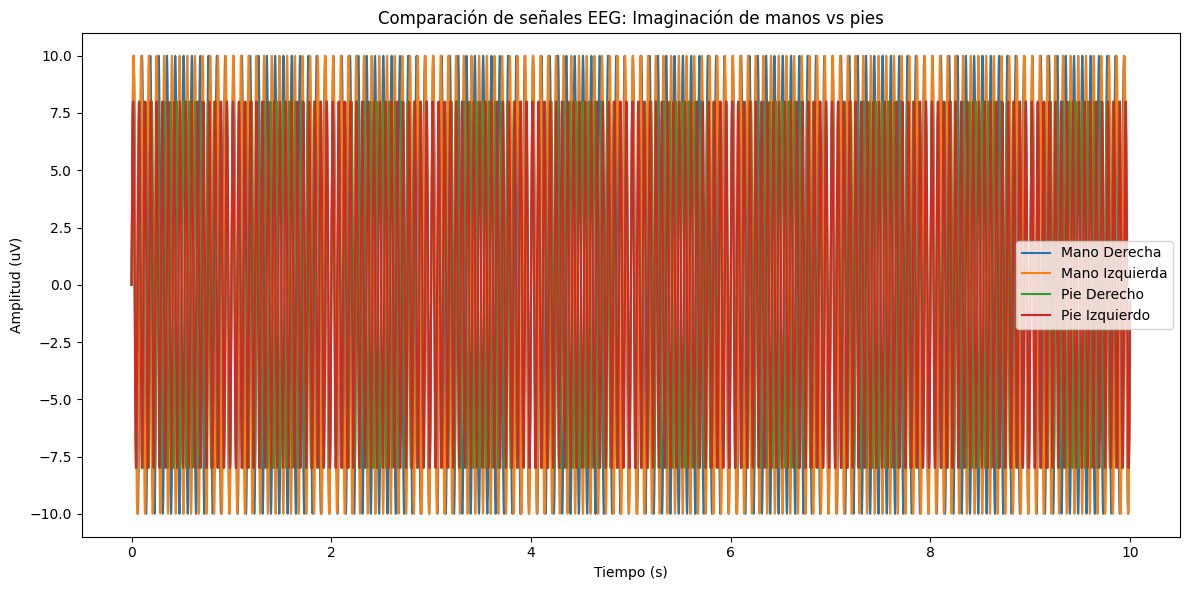

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(time, eeg_right_hand, label="Mano Derecha")
plt.plot(time, eeg_left_hand, label="Mano Izquierda")
plt.plot(time, eeg_right_foot, label="Pie Derecho")
plt.plot(time, eeg_left_foot, label="Pie Izquierdo")
plt.title("Comparación de señales EEG: Imaginación de manos vs pies")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.legend()
plt.tight_layout()
plt.show()

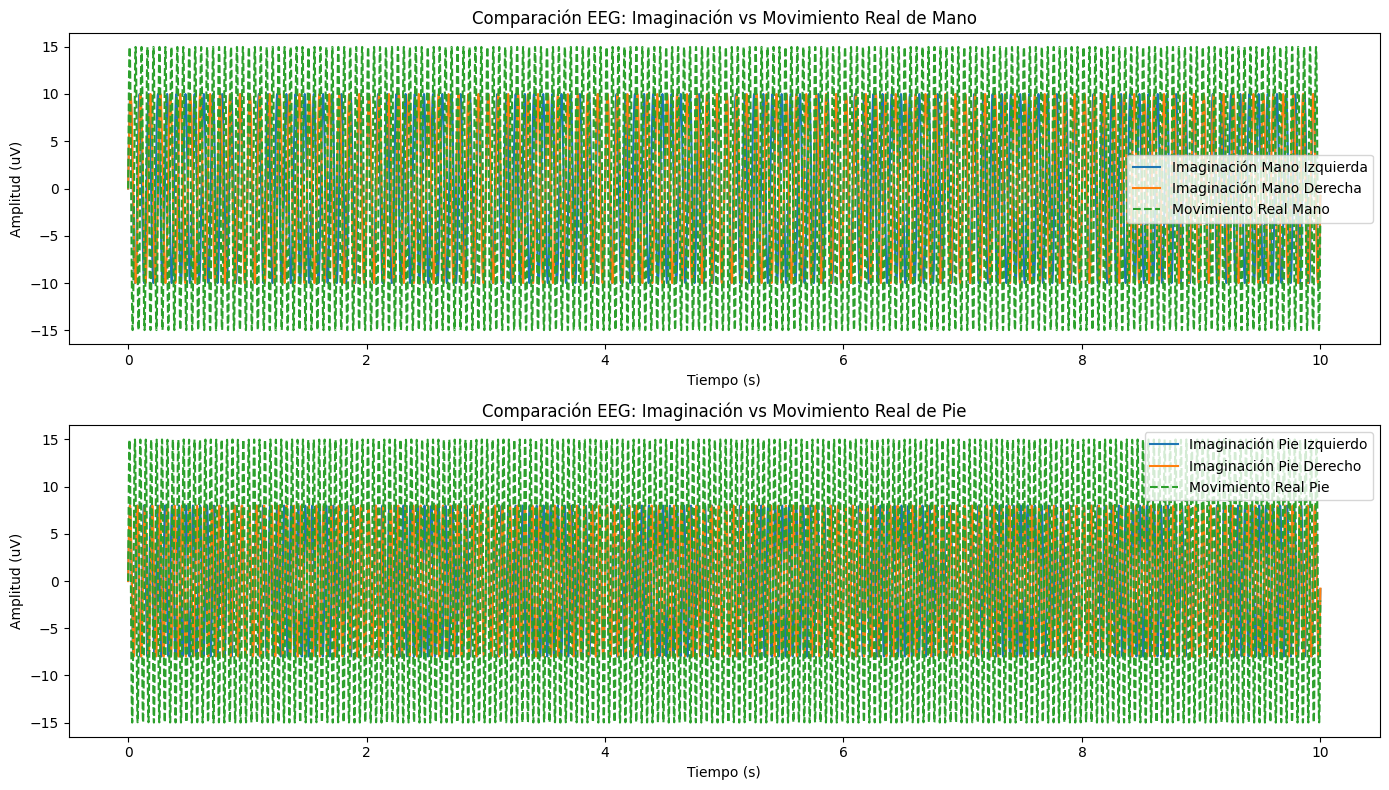

In [7]:
# Simular señales EEG durante actividad física real (por ejemplo, mover mano y pie)
eeg_real_hand = nk.signal_simulate(duration=duration, sampling_rate=sampling_rate, frequency=20, amplitude=15)  # Frecuencia y amplitud mayores
eeg_real_foot = nk.signal_simulate(duration=duration, sampling_rate=sampling_rate, frequency=22, amplitude=15)

plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(time, eeg_left_hand, label="Imaginación Mano Izquierda")
plt.plot(time, eeg_right_hand, label="Imaginación Mano Derecha")
plt.plot(time, eeg_real_hand, label="Movimiento Real Mano", linestyle='--')
plt.title("Comparación EEG: Imaginación vs Movimiento Real de Mano")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, eeg_left_foot, label="Imaginación Pie Izquierdo")
plt.plot(time, eeg_right_foot, label="Imaginación Pie Derecho")
plt.plot(time, eeg_real_foot, label="Movimiento Real Pie", linestyle='--')
plt.title("Comparación EEG: Imaginación vs Movimiento Real de Pie")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.legend()

plt.tight_layout()
plt.show()